# Wrangling minimum wage data and deriving hours needed to afford college

In [1]:
import pandas as pd
import json

In [2]:
min_wage = pd.read_csv('../data/min-wage.csv', index_col='State').T
min_wage.index = min_wage.index.astype('int64')
min_wage.head()

State  Federal (FLSA)  Alabama  Alaska  Arizona  Arkansas  California  \
1968              1.6      1.6     2.1      1.6       1.6        1.65   
1969              1.6      1.6     2.1      1.6       1.6        1.65   
1970              1.6      1.6     2.1      1.6       1.1        1.65   
1971              1.6      1.6     2.1      1.6       1.1        1.65   
1972              1.6      1.6     2.1      1.6       1.2        1.65   

State  Colorado  Connecticut  Delaware  Florida  ...  South Dakota  Tennessee  \
1968       1.25         1.40      1.25      1.6  ...           1.6        1.6   
1969       1.25         1.40      1.25      1.6  ...           1.6        1.6   
1970       1.25         1.60      1.25      1.6  ...           1.0        1.6   
1971       1.25         1.60      1.25      1.6  ...           1.0        1.6   
1972       1.25         1.85      1.60      1.6  ...           1.0        1.6   

State  Texas  Utah  Vermont  Virginia  Washington  West Virginia  Wisconsin  \
1968     1.6  1.15      1.4       1.6         1.6            1.0       1.25   
1969     1.6  1.15      1.4       1.6         1.6            1.0       1.25   
1970     1.6  1.15      1.6       1.6         1.6            1.0       1.30   
1971     1.6  1.15      1.6       1.6         1.6            1.0       1.30   
1972     1.4  1.35      1.6       1.6         1.6            1.2       1.45   

State  Wyoming  
1968       1.2  
1969       1.2  
1970       1.3  
1971       1.3  
1972       1.5  

[5 rows x 51 columns]

In [3]:
all_cost_current = pd.read_json('../data/All-Current.json', orient='records')
all_cost_current.index = all_cost_current['Year']
all_cost_current.head()

Board-2     Board-4   Board-All     Dorms-2     Dorms-4   Dorms-All  \
Year                                                                           
1963  395.044960  454.937898  457.334166  209.139956  278.597813  282.340689   
1966  431.477170  471.882876  475.569528  279.972440  327.065841  328.486266   
1967  450.370807  483.472336  485.613271  301.329502  341.174294  341.988509   
1968  475.663160  501.845282  502.013997  326.882309  360.117907  360.264036   
1969  495.018319  527.586644  525.670335  346.912636  391.873724  389.228228   

          Total-2      Total-4    Total-All   Tuition-2   Tuition-4  \
Year                                                                  
1963   775.433503  1286.114126  1247.922549  171.248587  552.578415   
1966   925.743434  1439.250028  1378.029556  214.293824  640.301311   
1967   983.812370  1487.318021  1415.127765  232.112061  662.671391   
1968  1052.943480  1545.252009  1458.609973  250.398012  683.288820   
1969  1089.373133  1674.468407  1560.038913  247.442178  755.008039   

      Tuition-All  Year  
Year                     
1963   508.247693  1963  
1966   573.973762  1966  
1967   587.525985  1967  
1968   596.331940  1968  
1969   645.140350  1969

In [4]:
all_cost_constant = pd.read_json('../data/All-Constant.json', orient='records')
all_cost_constant.index = all_cost_constant['Year']
all_cost_constant.head()

Board-2      Board-4    Board-All      Dorms-2      Dorms-4  \
Year                                                                    
1963  3178.163729  3660.006516  3679.284657  1682.545256  2241.338463   
1966  3252.444158  3557.019490  3584.809208  2110.412298  2465.399000   
1967  3285.953505  3527.465798  3543.086290  2198.532230  2489.244085   
1968  3309.064322  3491.206504  3492.380210  2274.034816  2505.246190   
1969  3251.539787  3465.465619  3452.878293  2278.704029  2574.032020   

        Dorms-All      Total-2       Total-4     Total-All    Tuition-2  \
Year                                                                      
1963  2271.450158  6238.415583  10346.876133  10039.622279  1377.706598   
1966  2476.106063  6978.188028  10848.964137  10387.488583  1615.331572   
1967  2495.184685  7178.000122  10851.631123  10324.923309  1693.514386   
1968  2506.262771  7325.052682  10749.914487  10147.168479  1741.953544   
1969  2556.655018  7155.573739  10998.786178  10247.153284  1625.329924   

        Tuition-4  Tuition-All  Year  
Year                                  
1963  4445.531154  4088.887464  1963  
1966  4826.545648  4326.573312  1966  
1967  4834.921240  4286.652333  1967  
1968  4753.461792  4148.525498  1968  
1969  4959.288539  4237.619973  1969

In [5]:
min_wage.index

Int64Index([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64')

In [6]:
all_cost_current.index

Int64Index([1963, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
            1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='Year')

In [7]:
min_wage.loc[1968]

State
Federal (FLSA)    1.60
Alabama           1.60
Alaska            2.10
Arizona           1.60
Arkansas          1.60
California        1.65
Colorado          1.25
Connecticut       1.40
Delaware          1.25
Florida           1.60
Georgia           1.60
Hawaii            1.25
Idaho             1.15
Illinois          1.60
Indiana           1.15
Iowa              1.60
Kansas            1.60
Kentucky          0.75
Louisiana         1.60
Maine             1.40
Maryland          1.15
Massachusetts     1.60
Michigan          1.25
Minnesota         1.15
Mississippi       1.60
Missouri          1.60
Montana           1.60
Nebraska          1.00
Nevada            1.25
New Hampshire     1.40
New Jersey        1.40
New Mexico        1.40
New York          1.60
North Carolina    1.00
North Dakota      1.25
Ohio              1.25
Oklahoma          1.00
Oregon            1.25
Pennsylvania      1.15
Rhode Island      1.40
South Carolina    1.60
South Dakota      1.60
Tennessee         1.60
Texas

In [8]:
all_cost_current.loc[1968]

Board-2         475.663160
Board-4         501.845282
Board-All       502.013997
Dorms-2         326.882309
Dorms-4         360.117907
Dorms-All       360.264036
Total-2        1052.943480
Total-4        1545.252009
Total-All      1458.609973
Tuition-2       250.398012
Tuition-4       683.288820
Tuition-All     596.331940
Year           1968.000000
Name: 1968, dtype: float64

The structure of the resulting hours-per week required dataset will be as follows:
```json
[
    {
    year: 1968,
    hours-per-week: [
        {
        state: Federal (FLSA),
        Board-2: ...
        Board-4: ...
        Board-All: ...
        Dorms-2: ...
        Dorms-4: ...
        Dorms-All: ...
        Total-2: ...
        Total-4: ...
        Total-All: ...
        Tuition-2: ...
        Tuition-4: ...
        Tuition-All: ...
        },
        {
        ...
        },
        ...
    ]
    },
    {
    year: 1969
    hours: [ ... ]
    },
    ...    
]
```

In [9]:
final_set = []
for year in range(1968, 2018):
    print(year)
    new_dict = dict()
    wages = min_wage.loc[year]
    costs = all_cost_current.loc[year]
    new_dict['year'] = year
    new_dict['hours'] = []
    for state, wage in wages.iteritems():
        cost_dict = dict()
        print(state)
        cost_dict['state'] = state
        for typ, cost in costs.iteritems():
            if typ == 'Year':
                continue
            print('\t', typ, ': ', cost/wage/52, ' hrs/week')
            cost_dict[typ] = cost/wage/52
        new_dict['hours'].append(cost_dict)    
        
    print()
    final_set.append(new_dict)

1968
Federal (FLSA)
	 Board-2 :  5.717105284489098  hrs/week
	 Board-4 :  6.031794252320481  hrs/week
	 Board-All :  6.033822075372331  hrs/week
	 Dorms-2 :  3.9288739058220066  hrs/week
	 Dorms-4 :  4.328340231372367  hrs/week
	 Dorms-All :  4.330096589716335  hrs/week
	 Total-2 :  12.655570677674758  hrs/week
	 Total-4 :  18.572740493383655  hrs/week
	 Total-All :  17.531369867273437  hrs/week
	 Tuition-2 :  3.0095914873636533  hrs/week
	 Tuition-4 :  8.212606009690841  hrs/week
	 Tuition-All :  7.167451202184723  hrs/week
Alabama
	 Board-2 :  5.717105284489098  hrs/week
	 Board-4 :  6.031794252320481  hrs/week
	 Board-All :  6.033822075372331  hrs/week
	 Dorms-2 :  3.9288739058220066  hrs/week
	 Dorms-4 :  4.328340231372367  hrs/week
	 Dorms-All :  4.330096589716335  hrs/week
	 Total-2 :  12.655570677674758  hrs/week
	 Total-4 :  18.572740493383655  hrs/week
	 Total-All :  17.531369867273437  hrs/week
	 Tuition-2 :  3.0095914873636533  hrs/week
	 Tuition-4 :  8.212606009690841  hrs/

	 Dorms-All :  4.678223893844663  hrs/week
	 Total-2 :  13.093427079147956  hrs/week
	 Total-4 :  20.125822195460213  hrs/week
	 Total-All :  18.750467702606247  hrs/week
	 Tuition-2 :  2.9740646403467066  hrs/week
	 Tuition-4 :  9.07461584753495  hrs/week
	 Tuition-All :  7.754090745742572  hrs/week
Michigan
	 Board-2 :  7.615666447276231  hrs/week
	 Board-4 :  8.1167176071548  hrs/week
	 Board-All :  8.087235920664323  hrs/week
	 Dorms-2 :  5.337117474389416  hrs/week
	 Dorms-4 :  6.028826518189553  hrs/week
	 Dorms-All :  5.9881265841211695  hrs/week
	 Total-2 :  16.759586661309385  hrs/week
	 Total-4 :  25.761052410189073  hrs/week
	 Total-All :  24.000598659336  hrs/week
	 Tuition-2 :  3.8068027396437847  hrs/week
	 Tuition-4 :  11.615508284844738  hrs/week
	 Tuition-All :  9.925236154550493  hrs/week
Minnesota
	 Board-2 :  8.277898312256774  hrs/week
	 Board-4 :  8.82251913821174  hrs/week
	 Board-All :  8.790473826809047  hrs/week
	 Dorms-2 :  5.801214646075452  hrs/week
	 Dorms

Federal (FLSA)
	 Board-2 :  6.370219448578521  hrs/week
	 Board-4 :  6.776771283842259  hrs/week
	 Board-All :  6.751979035097752  hrs/week
	 Dorms-2 :  4.698362361563413  hrs/week
	 Dorms-4 :  5.389691173458245  hrs/week
	 Dorms-All :  5.347532721860985  hrs/week
	 Total-2 :  14.083239238041585  hrs/week
	 Total-4 :  22.567135009218752  hrs/week
	 Total-All :  20.79914993848774  hrs/week
	 Tuition-2 :  3.014657427899603  hrs/week
	 Tuition-4 :  10.400672551918255  hrs/week
	 Tuition-All :  8.699638181529014  hrs/week
Alabama
	 Board-2 :  6.370219448578521  hrs/week
	 Board-4 :  6.776771283842259  hrs/week
	 Board-All :  6.751979035097752  hrs/week
	 Dorms-2 :  4.698362361563413  hrs/week
	 Dorms-4 :  5.389691173458245  hrs/week
	 Dorms-All :  5.347532721860985  hrs/week
	 Total-2 :  14.083239238041585  hrs/week
	 Total-4 :  22.567135009218752  hrs/week
	 Total-All :  20.79914993848774  hrs/week
	 Tuition-2 :  3.014657427899603  hrs/week
	 Tuition-4 :  10.400672551918255  hrs/week
	 Tu

	 Dorms-2 :  5.318319614972603  hrs/week
	 Dorms-4 :  6.3131993227414736  hrs/week
	 Dorms-All :  6.253594249828705  hrs/week
	 Total-2 :  16.35833506990756  hrs/week
	 Total-4 :  26.03509380513487  hrs/week
	 Total-All :  23.51769233022731  hrs/week
	 Tuition-2 :  3.677555878866359  hrs/week
	 Tuition-4 :  12.183859571139923  hrs/week
	 Tuition-All :  9.736582210365448  hrs/week
New Mexico
	 Board-2 :  6.902305852564374  hrs/week
	 Board-4 :  7.066907729300156  hrs/week
	 Board-All :  7.057046128156021  hrs/week
	 Dorms-2 :  4.985924639036814  hrs/week
	 Dorms-4 :  5.918624365070131  hrs/week
	 Dorms-All :  5.862744609214411  hrs/week
	 Total-2 :  15.335939128038339  hrs/week
	 Total-4 :  24.407900442313938  hrs/week
	 Total-All :  22.0478365595881  hrs/week
	 Tuition-2 :  3.447708636437212  hrs/week
	 Tuition-4 :  11.422368347943678  hrs/week
	 Tuition-All :  9.128045822217608  hrs/week
New York
	 Board-2 :  5.9695618184340535  hrs/week
	 Board-4 :  6.1119201983136495  hrs/week
	 Boa

	 Board-All :  8.869456656348243  hrs/week
	 Dorms-2 :  6.321409993169355  hrs/week
	 Dorms-4 :  7.317072371238394  hrs/week
	 Dorms-All :  7.253129660675111  hrs/week
	 Total-2 :  19.663466934239974  hrs/week
	 Total-4 :  30.035701486597944  hrs/week
	 Total-All :  27.240235666274177  hrs/week
	 Tuition-2 :  4.500183879349602  hrs/week
	 Tuition-4 :  13.847279432740523  hrs/week
	 Tuition-All :  11.117649349250797  hrs/week
Illinois
	 Board-2 :  8.841873061720962  hrs/week
	 Board-4 :  8.871349682618984  hrs/week
	 Board-All :  8.869456656348243  hrs/week
	 Dorms-2 :  6.321409993169355  hrs/week
	 Dorms-4 :  7.317072371238394  hrs/week
	 Dorms-All :  7.253129660675111  hrs/week
	 Total-2 :  19.663466934239974  hrs/week
	 Total-4 :  30.035701486597944  hrs/week
	 Total-All :  27.240235666274177  hrs/week
	 Tuition-2 :  4.500183879349602  hrs/week
	 Tuition-4 :  13.847279432740523  hrs/week
	 Tuition-All :  11.117649349250797  hrs/week
Indiana
	 Board-2 :  9.902897829127479  hrs/week
	 

	 Board-4 :  9.691931959527226  hrs/week
	 Board-All :  9.688670794671292  hrs/week
	 Dorms-2 :  6.510897015745329  hrs/week
	 Dorms-4 :  7.913233509516828  hrs/week
	 Dorms-All :  7.814537568120288  hrs/week
	 Total-2 :  20.239022705727336  hrs/week
	 Total-4 :  32.34613855102775  hrs/week
	 Total-All :  28.891403830586537  hrs/week
	 Tuition-2 :  4.082530493901978  hrs/week
	 Tuition-4 :  14.740973081983652  hrs/week
	 Tuition-All :  11.388195467795002  hrs/week
Utah
	 Board-2 :  10.00283946260151  hrs/week
	 Board-4 :  10.050892402472677  hrs/week
	 Board-All :  10.047510453733192  hrs/week
	 Dorms-2 :  6.752041349661823  hrs/week
	 Dorms-4 :  8.206316232091524  hrs/week
	 Dorms-All :  8.103964885458076  hrs/week
	 Total-2 :  20.988616139272793  hrs/week
	 Total-4 :  33.54414368254729  hrs/week
	 Total-All :  29.96145582431196  hrs/week
	 Tuition-2 :  4.233735327009459  hrs/week
	 Tuition-4 :  15.286935047983047  hrs/week
	 Tuition-All :  11.80998048512074  hrs/week
Vermont
	 Board-

	 Tuition-4 :  15.522597225884011  hrs/week
	 Tuition-All :  11.832553207249122  hrs/week
Nevada
	 Board-2 :  6.693287982196329  hrs/week
	 Board-4 :  6.519149318881246  hrs/week
	 Board-All :  6.53015377677776  hrs/week
	 Dorms-2 :  4.387546069973603  hrs/week
	 Dorms-4 :  5.466781571387667  hrs/week
	 Dorms-All :  5.395288312934951  hrs/week
	 Total-2 :  14.242904466272076  hrs/week
	 Total-4 :  22.78425939523169  hrs/week
	 Total-All :  20.15678345127734  hrs/week
	 Tuition-2 :  3.162070414102124  hrs/week
	 Tuition-4 :  10.798328504962793  hrs/week
	 Tuition-All :  8.231341361564606  hrs/week
New Hampshire
	 Board-2 :  6.693287982196329  hrs/week
	 Board-4 :  6.519149318881246  hrs/week
	 Board-All :  6.53015377677776  hrs/week
	 Dorms-2 :  4.387546069973603  hrs/week
	 Dorms-4 :  5.466781571387667  hrs/week
	 Dorms-All :  5.395288312934951  hrs/week
	 Total-2 :  14.242904466272076  hrs/week
	 Total-4 :  22.78425939523169  hrs/week
	 Total-All :  20.15678345127734  hrs/week
	 Tuiti

	 Board-All :  6.496315418091067  hrs/week
	 Dorms-2 :  4.557175593165312  hrs/week
	 Dorms-4 :  5.5098634154067065  hrs/week
	 Dorms-All :  5.449243039356829  hrs/week
	 Total-2 :  14.364476885871046  hrs/week
	 Total-4 :  22.98297235732163  hrs/week
	 Total-All :  20.38402269739949  hrs/week
	 Tuition-2 :  3.272642038436691  hrs/week
	 Tuition-4 :  10.979262815023949  hrs/week
	 Tuition-All :  8.438464239951596  hrs/week
Idaho
	 Board-2 :  7.529063923396924  hrs/week
	 Board-4 :  7.4820401027221575  hrs/week
	 Board-All :  7.484885155626665  hrs/week
	 Dorms-2 :  5.250658835603512  hrs/week
	 Dorms-4 :  6.348320891664248  hrs/week
	 Dorms-All :  6.278475675780694  hrs/week
	 Total-2 :  16.550375542416642  hrs/week
	 Total-4 :  26.480381194305355  hrs/week
	 Total-All :  23.48593919482985  hrs/week
	 Tuition-2 :  3.770652783416188  hrs/week
	 Tuition-4 :  12.650020199918897  hrs/week
	 Tuition-All :  9.722578363422492  hrs/week
Illinois
	 Board-2 :  7.529063923396924  hrs/week
	 Board

	 Dorms-2 :  8.467942075002956  hrs/week
	 Dorms-4 :  10.166938909963424  hrs/week
	 Dorms-All :  10.050588106520252  hrs/week
	 Total-2 :  26.804682099360456  hrs/week
	 Total-4 :  42.060276945397234  hrs/week
	 Total-All :  37.274723849528364  hrs/week
	 Tuition-2 :  6.320880382044158  hrs/week
	 Tuition-4 :  20.176164539731005  hrs/week
	 Tuition-All :  15.488157205845432  hrs/week

1981
Federal (FLSA)
	 Board-2 :  6.277616931756544  hrs/week
	 Board-4 :  6.212141994689551  hrs/week
	 Board-All :  6.216298080619632  hrs/week
	 Dorms-2 :  4.549418238546837  hrs/week
	 Dorms-4 :  5.519038477982738  hrs/week
	 Dorms-All :  5.452701687078174  hrs/week
	 Total-2 :  14.211546649838116  hrs/week
	 Total-4 :  22.6797081970469  hrs/week
	 Total-All :  20.030905627949366  hrs/week
	 Tuition-2 :  3.3845114795347246  hrs/week
	 Tuition-4 :  10.948527724374626  hrs/week
	 Tuition-All :  8.36190586025155  hrs/week
Alabama
	 Board-2 :  6.277616931756544  hrs/week
	 Board-4 :  6.212141994689551  hr

	 Dorms-All :  6.1057837775468995  hrs/week
	 Total-2 :  15.576576348066418  hrs/week
	 Total-4 :  25.292619855738515  hrs/week
	 Total-All :  22.254215577150056  hrs/week
	 Tuition-2 :  3.872766755900712  hrs/week
	 Tuition-4 :  12.281126236995352  hrs/week
	 Tuition-All :  9.333094928129736  hrs/week
Rhode Island
	 Board-2 :  7.728099148861473  hrs/week
	 Board-4 :  7.882635002031963  hrs/week
	 Board-All :  7.872889144633157  hrs/week
	 Dorms-2 :  5.791818828295478  hrs/week
	 Dorms-4 :  7.147883488585079  hrs/week
	 Dorms-All :  7.053232984407627  hrs/week
	 Total-2 :  17.99363129862845  hrs/week
	 Total-4 :  29.21733672990484  hrs/week
	 Total-All :  25.707455925328514  hrs/week
	 Tuition-2 :  4.473713321471513  hrs/week
	 Tuition-4 :  14.186818239287733  hrs/week
	 Tuition-All :  10.781333796287798  hrs/week
South Carolina
	 Board-2 :  6.689996278118885  hrs/week
	 Board-4 :  6.823773583848564  hrs/week
	 Board-All :  6.815336871473478  hrs/week
	 Dorms-2 :  5.013813314046832  hr

	 Dorms-2 :  6.071365406054649  hrs/week
	 Dorms-4 :  7.3600906193082665  hrs/week
	 Dorms-All :  7.2739441729825485  hrs/week
	 Total-2 :  18.251403351343054  hrs/week
	 Total-4 :  29.62387438623444  hrs/week
	 Total-All :  26.19233674924644  hrs/week
	 Tuition-2 :  4.713872128079799  hrs/week
	 Tuition-4 :  14.738536682246957  hrs/week
	 Tuition-All :  11.396684673176406  hrs/week
Maine
	 Board-2 :  7.466165817208611  hrs/week
	 Board-4 :  7.52524708467922  hrs/week
	 Board-All :  7.521707903087428  hrs/week
	 Dorms-2 :  6.071365406054649  hrs/week
	 Dorms-4 :  7.3600906193082665  hrs/week
	 Dorms-All :  7.2739441729825485  hrs/week
	 Total-2 :  18.251403351343054  hrs/week
	 Total-4 :  29.62387438623444  hrs/week
	 Total-All :  26.19233674924644  hrs/week
	 Tuition-2 :  4.713872128079799  hrs/week
	 Tuition-4 :  14.738536682246957  hrs/week
	 Tuition-All :  11.396684673176406  hrs/week
Maryland
	 Board-2 :  7.466165817208611  hrs/week
	 Board-4 :  7.52524708467922  hrs/week
	 Board-

	 Dorms-All :  14.217524818938463  hrs/week
	 Total-2 :  33.3537798899999  hrs/week
	 Total-4 :  60.36474445743239  hrs/week
	 Total-All :  52.68961398093199  hrs/week
	 Tuition-2 :  9.081174652758552  hrs/week
	 Tuition-4 :  30.790787968610122  hrs/week
	 Tuition-All :  23.4009341394501  hrs/week
Connecticut
	 Board-2 :  7.7833453568151105  hrs/week
	 Board-4 :  8.533430014797478  hrs/week
	 Board-All :  8.497090368793026  hrs/week
	 Dorms-2 :  5.901506260620635  hrs/week
	 Dorms-4 :  8.140313999671992  hrs/week
	 Dorms-All :  8.015815179816936  hrs/week
	 Total-2 :  18.80480171839757  hrs/week
	 Total-4 :  34.033535450777904  hrs/week
	 Total-All :  29.706310553047707  hrs/week
	 Tuition-2 :  5.119950100961796  hrs/week
	 Tuition-4 :  17.359791436308377  hrs/week
	 Tuition-All :  13.193405004437741  hrs/week
Delaware
	 Board-2 :  13.114936926233462  hrs/week
	 Board-4 :  14.37882957493375  hrs/week
	 Board-All :  14.317597271416249  hrs/week
	 Dorms-2 :  9.944038049145771  hrs/week
	

	 Total-2 :  18.731203315926347  hrs/week
	 Total-4 :  36.00656958004386  hrs/week
	 Total-All :  31.541223159162108  hrs/week
	 Tuition-2 :  4.6452782686112055  hrs/week
	 Tuition-4 :  18.374516254483293  hrs/week
	 Tuition-All :  14.110310029420493  hrs/week
Virginia
	 Board-2 :  10.42571649463926  hrs/week
	 Board-4 :  11.286429739897606  hrs/week
	 Board-All :  11.239734796561322  hrs/week
	 Dorms-2 :  7.381018942532729  hrs/week
	 Dorms-4 :  11.00314710562228  hrs/week
	 Dorms-All :  10.795570480659215  hrs/week
	 Total-2 :  23.67906834277482  hrs/week
	 Total-4 :  45.51773890307432  hrs/week
	 Total-All :  39.87286701252569  hrs/week
	 Tuition-2 :  5.872332905602845  hrs/week
	 Tuition-4 :  23.228162057554357  hrs/week
	 Tuition-All :  17.83756173530515  hrs/week
Washington
	 Board-2 :  12.012238569910453  hrs/week
	 Board-4 :  13.003929917708112  hrs/week
	 Board-All :  12.950129222125003  hrs/week
	 Dorms-2 :  8.504217477265971  hrs/week
	 Dorms-4 :  12.677539056477844  hrs/wee

	 Total-All :  35.63271544712945  hrs/week
	 Tuition-2 :  5.6130744991523365  hrs/week
	 Tuition-4 :  21.815073487546385  hrs/week
	 Tuition-All :  16.298740924122157  hrs/week
North Dakota
	 Board-2 :  10.064641602429589  hrs/week
	 Board-4 :  10.773654546269416  hrs/week
	 Board-All :  10.73242975753691  hrs/week
	 Dorms-2 :  6.8531386681695405  hrs/week
	 Dorms-4 :  10.388722012491874  hrs/week
	 Dorms-All :  10.160736259261292  hrs/week
	 Total-2 :  22.983522068070222  hrs/week
	 Total-4 :  44.736730166271094  hrs/week
	 Total-All :  38.50632153157537  hrs/week
	 Tuition-2 :  6.065741797471073  hrs/week
	 Tuition-4 :  23.574353607509803  hrs/week
	 Tuition-All :  17.61315551477717  hrs/week
Ohio
	 Board-2 :  13.565386507622492  hrs/week
	 Board-4 :  14.52101264931965  hrs/week
	 Board-All :  14.465448803636708  hrs/week
	 Dorms-2 :  9.236839074489382  hrs/week
	 Dorms-4 :  14.002190538576004  hrs/week
	 Dorms-All :  13.694905392917393  hrs/week
	 Total-2 :  30.977790613485958  hrs/

	 Tuition-2 :  6.098424982276411  hrs/week
	 Tuition-4 :  22.48887575225405  hrs/week
	 Tuition-All :  16.848730181394203  hrs/week
Michigan
	 Board-2 :  9.715382596854536  hrs/week
	 Board-4 :  11.086798541469976  hrs/week
	 Board-All :  11.007874680422846  hrs/week
	 Dorms-2 :  6.948504300447532  hrs/week
	 Dorms-4 :  11.028102912427212  hrs/week
	 Dorms-All :  10.75762376679868  hrs/week
	 Total-2 :  23.49048202671596  hrs/week
	 Total-4 :  47.28901610194277  hrs/week
	 Total-All :  40.62601730699116  hrs/week
	 Tuition-2 :  6.826595129413892  hrs/week
	 Tuition-4 :  25.17411464804558  hrs/week
	 Tuition-All :  18.86051885976963  hrs/week
Minnesota
	 Board-2 :  7.658007458697104  hrs/week
	 Board-4 :  8.739005909158688  hrs/week
	 Board-All :  8.676795336333303  hrs/week
	 Dorms-2 :  5.477056330940996  hrs/week
	 Dorms-4 :  8.692739942736743  hrs/week
	 Dorms-All :  8.479538733829546  hrs/week
	 Total-2 :  18.516027009293758  hrs/week
	 Total-4 :  37.27487151564901  hrs/week
	 Total

	 Tuition-4 :  23.16312995307656  hrs/week
	 Tuition-All :  17.31786680928801  hrs/week
Georgia
	 Board-2 :  10.164785849989348  hrs/week
	 Board-4 :  12.228875758847279  hrs/week
	 Board-All :  12.11205764452361  hrs/week
	 Dorms-2 :  7.882729638788638  hrs/week
	 Dorms-4 :  12.488818564389586  hrs/week
	 Dorms-All :  12.172061328907752  hrs/week
	 Total-2 :  26.3238607595674  hrs/week
	 Total-4 :  55.007941184952365  hrs/week
	 Total-All :  46.93056018557728  hrs/week
	 Tuition-2 :  8.27634527078941  hrs/week
	 Tuition-4 :  30.290246861715502  hrs/week
	 Tuition-All :  22.646441212145856  hrs/week
Hawaii
	 Board-2 :  8.58066337986114  hrs/week
	 Board-4 :  10.323076939286665  hrs/week
	 Board-All :  10.22446424537707  hrs/week
	 Dorms-2 :  6.654252292483916  hrs/week
	 Dorms-4 :  10.54250917773147  hrs/week
	 Dorms-All :  10.27511670622083  hrs/week
	 Total-2 :  22.22144090093352  hrs/week
	 Total-4 :  46.43527502625849  hrs/week
	 Total-All :  39.61670665016264  hrs/week
	 Tuition-2

	 Board-2 :  7.917383985131222  hrs/week
	 Board-4 :  9.672265623579955  hrs/week
	 Board-All :  9.573381718247331  hrs/week
	 Dorms-2 :  6.316482466075158  hrs/week
	 Dorms-4 :  9.952497777358731  hrs/week
	 Dorms-All :  9.707348155301267  hrs/week
	 Total-2 :  20.965165883570045  hrs/week
	 Total-4 :  44.01783720412972  hrs/week
	 Total-All :  37.58151295608611  hrs/week
	 Tuition-2 :  6.731299432363665  hrs/week
	 Tuition-4 :  24.393073803191083  hrs/week
	 Tuition-All :  18.30078308253751  hrs/week
Wyoming
	 Board-2 :  21.030551210504807  hrs/week
	 Board-4 :  25.691955562634256  hrs/week
	 Board-All :  25.42929518909447  hrs/week
	 Dorms-2 :  16.77815655051214  hrs/week
	 Dorms-4 :  26.43632222110913  hrs/week
	 Dorms-All :  25.78514353751899  hrs/week
	 Total-2 :  55.68872187823293  hrs/week
	 Total-4 :  116.92238007346957  hrs/week
	 Total-All :  99.82589378960371  hrs/week
	 Tuition-2 :  17.880014117215985  hrs/week
	 Tuition-4 :  64.79410228972633  hrs/week
	 Tuition-All :  48

	 Board-4 :  9.314324367598584  hrs/week
	 Board-All :  9.215777631915223  hrs/week
	 Dorms-2 :  6.163918060483482  hrs/week
	 Dorms-4 :  9.803937400979919  hrs/week
	 Dorms-All :  9.57638066209008  hrs/week
	 Total-2 :  19.818534848948826  hrs/week
	 Total-4 :  43.88933220236073  hrs/week
	 Total-All :  37.2703755199338  hrs/week
	 Tuition-2 :  6.246994654555507  hrs/week
	 Tuition-4 :  24.771070433782263  hrs/week
	 Tuition-All :  18.478217225928542  hrs/week
Pennsylvania
	 Board-2 :  8.279107090840407  hrs/week
	 Board-4 :  10.410127234374887  hrs/week
	 Board-All :  10.29998676508172  hrs/week
	 Dorms-2 :  6.889084891128598  hrs/week
	 Dorms-4 :  10.957341801095204  hrs/week
	 Dorms-All :  10.7030136811595  hrs/week
	 Total-2 :  22.150127184119278  hrs/week
	 Total-4 :  49.05278304969728  hrs/week
	 Total-All :  41.65512558110249  hrs/week
	 Tuition-2 :  6.981935202150272  hrs/week
	 Tuition-4 :  27.685314014227238  hrs/week
	 Tuition-All :  20.65212513486131  hrs/week
Rhode Island

	 Board-All :  9.35598158888357  hrs/week
	 Dorms-2 :  6.034356072961016  hrs/week
	 Dorms-4 :  9.80397450360381  hrs/week
	 Dorms-All :  9.549219241414152  hrs/week
	 Total-2 :  19.756779218470236  hrs/week
	 Total-4 :  44.39282298814749  hrs/week
	 Total-All :  37.62424336434503  hrs/week
	 Tuition-2 :  6.442479573979759  hrs/week
	 Tuition-4 :  25.10360771162334  hrs/week
	 Tuition-All :  18.71904253404742  hrs/week
Montana
	 Board-2 :  7.279943571529462  hrs/week
	 Board-4 :  9.485240772920498  hrs/week
	 Board-All :  9.35598158888357  hrs/week
	 Dorms-2 :  6.034356072961016  hrs/week
	 Dorms-4 :  9.80397450360381  hrs/week
	 Dorms-All :  9.549219241414152  hrs/week
	 Total-2 :  19.756779218470236  hrs/week
	 Total-4 :  44.39282298814749  hrs/week
	 Total-All :  37.62424336434503  hrs/week
	 Tuition-2 :  6.442479573979759  hrs/week
	 Tuition-4 :  25.10360771162334  hrs/week
	 Tuition-All :  18.71904253404742  hrs/week
Nebraska
	 Board-2 :  7.279943571529462  hrs/week
	 Board-4 :  9

	 Dorms-4 :  10.801814786108887  hrs/week
	 Dorms-All :  10.53561344304455  hrs/week
	 Total-2 :  20.411654877048804  hrs/week
	 Total-4 :  48.254176533777816  hrs/week
	 Total-All :  40.4023215298876  hrs/week
	 Tuition-2 :  6.341084210867438  hrs/week
	 Tuition-4 :  27.526268586783047  hrs/week
	 Tuition-All :  20.07913396828413  hrs/week
Indiana
	 Board-2 :  7.421224160708923  hrs/week
	 Board-4 :  9.926093160886033  hrs/week
	 Board-All :  9.787574118559037  hrs/week
	 Dorms-2 :  6.649346505472479  hrs/week
	 Dorms-4 :  10.801814786108887  hrs/week
	 Dorms-All :  10.53561344304455  hrs/week
	 Total-2 :  20.411654877048804  hrs/week
	 Total-4 :  48.254176533777816  hrs/week
	 Total-All :  40.4023215298876  hrs/week
	 Tuition-2 :  6.341084210867438  hrs/week
	 Tuition-4 :  27.526268586783047  hrs/week
	 Tuition-All :  20.07913396828413  hrs/week
Iowa
	 Board-2 :  7.421224160708923  hrs/week
	 Board-4 :  9.926093160886033  hrs/week
	 Board-All :  9.787574118559037  hrs/week
	 Dorms-2 

	 Board-2 :  8.483285624904441  hrs/week
	 Board-4 :  10.7071591454643  hrs/week
	 Board-All :  10.576243188526586  hrs/week
	 Dorms-2 :  7.755950110788236  hrs/week
	 Dorms-4 :  12.185082184151158  hrs/week
	 Dorms-All :  11.870841326403845  hrs/week
	 Total-2 :  23.34625963798301  hrs/week
	 Total-4 :  53.91737432202688  hrs/week
	 Total-All :  44.86004314541448  hrs/week
	 Tuition-2 :  7.1070239022903285  hrs/week
	 Tuition-4 :  31.025132992411386  hrs/week
	 Tuition-All :  22.4129586304842  hrs/week
Alaska
	 Board-2 :  7.732552383762457  hrs/week
	 Board-4 :  9.759622937901089  hrs/week
	 Board-All :  9.640292463878216  hrs/week
	 Dorms-2 :  7.069582844346799  hrs/week
	 Dorms-4 :  11.106756327146629  hrs/week
	 Dorms-All :  10.82032439486368  hrs/week
	 Total-2 :  21.280218962055308  hrs/week
	 Total-4 :  49.14592526698026  hrs/week
	 Total-All :  40.890127822811436  hrs/week
	 Tuition-2 :  6.478083733946051  hrs/week
	 Tuition-4 :  28.279546001932506  hrs/week
	 Tuition-All :  20

	 Board-All :  11.150891897360568  hrs/week
	 Dorms-2 :  8.245303517584391  hrs/week
	 Dorms-4 :  12.875867279622703  hrs/week
	 Dorms-All :  12.543888831938984  hrs/week
	 Total-2 :  25.03715990190056  hrs/week
	 Total-4 :  57.89907203192569  hrs/week
	 Total-All :  48.369977436427185  hrs/week
	 Tuition-2 :  8.11979718629074  hrs/week
	 Tuition-4 :  33.71477494244103  hrs/week
	 Tuition-All :  24.675196707127554  hrs/week
New Jersey
	 Board-2 :  8.67205919802543  hrs/week
	 Board-4 :  11.308429809862098  hrs/week
	 Board-All :  11.150891897360568  hrs/week
	 Dorms-2 :  8.245303517584391  hrs/week
	 Dorms-4 :  12.875867279622703  hrs/week
	 Dorms-All :  12.543888831938984  hrs/week
	 Total-2 :  25.03715990190056  hrs/week
	 Total-4 :  57.89907203192569  hrs/week
	 Total-All :  48.369977436427185  hrs/week
	 Tuition-2 :  8.11979718629074  hrs/week
	 Tuition-4 :  33.71477494244103  hrs/week
	 Tuition-All :  24.675196707127554  hrs/week
New Mexico
	 Board-2 :  10.508495263489637  hrs/wee

	 Dorms-All :  11.272377944584852  hrs/week
	 Total-2 :  21.407698323556833  hrs/week
	 Total-4 :  51.63139621981567  hrs/week
	 Total-All :  43.295215111636985  hrs/week
	 Tuition-2 :  7.150560414742366  hrs/week
	 Tuition-4 :  30.410826432900294  hrs/week
	 Tuition-All :  22.48963979911104  hrs/week
Indiana
	 Board-2 :  8.992236863658812  hrs/week
	 Board-4 :  12.202052105090441  hrs/week
	 Board-All :  12.032190852741149  hrs/week
	 Dorms-2 :  9.002209040670088  hrs/week
	 Dorms-4 :  14.581191315287974  hrs/week
	 Dorms-All :  14.227273133942047  hrs/week
	 Total-2 :  27.019425068566875  hrs/week
	 Total-4 :  65.16583988908775  hrs/week
	 Total-All :  54.644446257405896  hrs/week
	 Tuition-2 :  9.024979164237937  hrs/week
	 Tuition-4 :  38.3825964687091  hrs/week
	 Tuition-All :  28.384982270722666  hrs/week
Iowa
	 Board-2 :  8.992236863658812  hrs/week
	 Board-4 :  12.202052105090441  hrs/week
	 Board-All :  12.032190852741149  hrs/week
	 Dorms-2 :  9.002209040670088  hrs/week
	 Do

	 Dorms-4 :  16.119182904500747  hrs/week
	 Dorms-All :  15.733302237809447  hrs/week
	 Total-2 :  28.51817727523577  hrs/week
	 Total-4 :  72.30907779480582  hrs/week
	 Total-All :  60.59518728687304  hrs/week
	 Tuition-2 :  9.395083014758923  hrs/week
	 Tuition-4 :  42.774328283769236  hrs/week
	 Tuition-All :  31.665652158911914  hrs/week
Alabama
	 Board-2 :  9.286577581637863  hrs/week
	 Board-4 :  13.415566606535958  hrs/week
	 Board-All :  13.196232890151643  hrs/week
	 Dorms-2 :  9.836516678838946  hrs/week
	 Dorms-4 :  16.119182904500747  hrs/week
	 Dorms-All :  15.733302237809447  hrs/week
	 Total-2 :  28.51817727523577  hrs/week
	 Total-4 :  72.30907779480582  hrs/week
	 Total-All :  60.59518728687304  hrs/week
	 Tuition-2 :  9.395083014758923  hrs/week
	 Tuition-4 :  42.774328283769236  hrs/week
	 Tuition-All :  31.665652158911914  hrs/week
Alaska
	 Board-2 :  6.688933502858041  hrs/week
	 Board-4 :  9.662960562749676  hrs/week
	 Board-All :  9.50497893486447  hrs/week
	 Dor

	 Total-2 :  21.35878750049293  hrs/week
	 Total-4 :  52.914048470923596  hrs/week
	 Total-All :  44.2959268986975  hrs/week
	 Tuition-2 :  6.80088967272765  hrs/week
	 Tuition-4 :  31.3037040117105  hrs/week
	 Tuition-All :  23.108665233890978  hrs/week
South Carolina
	 Board-2 :  9.269805355141617  hrs/week
	 Board-4 :  12.3558170349428  hrs/week
	 Board-All :  12.186023451792112  hrs/week
	 Dorms-2 :  9.14531326459566  hrs/week
	 Dorms-4 :  14.98034518696795  hrs/week
	 Dorms-All :  14.614957115655459  hrs/week
	 Total-2 :  27.017953419426956  hrs/week
	 Total-4 :  66.93401003159566  hrs/week
	 Total-All :  56.03245453852334  hrs/week
	 Tuition-2 :  8.602834799689678  hrs/week
	 Tuition-4 :  39.59784780968508  hrs/week
	 Tuition-All :  29.231473971075772  hrs/week
South Dakota
	 Board-2 :  9.269805355141617  hrs/week
	 Board-4 :  12.3558170349428  hrs/week
	 Board-All :  12.186023451792112  hrs/week
	 Dorms-2 :  9.14531326459566  hrs/week
	 Dorms-4 :  14.98034518696795  hrs/week
	 D

	 Total-4 :  58.55115466514721  hrs/week
	 Total-All :  49.006255205188054  hrs/week
	 Tuition-2 :  8.11578659264374  hrs/week
	 Tuition-4 :  34.33799175472493  hrs/week
	 Tuition-All :  25.397754078916496  hrs/week
Nevada
	 Board-2 :  6.965073501245542  hrs/week
	 Board-4 :  10.464718404589302  hrs/week
	 Board-All :  10.246204474420072  hrs/week
	 Dorms-2 :  7.82990849853115  hrs/week
	 Dorms-4 :  12.786332072306315  hrs/week
	 Dorms-All :  12.424210514383876  hrs/week
	 Total-2 :  22.58828700595777  hrs/week
	 Total-4 :  56.22461871818772  hrs/week
	 Total-All :  47.058986786438865  hrs/week
	 Tuition-2 :  7.793305006181075  hrs/week
	 Tuition-4 :  32.973568241292156  hrs/week
	 Tuition-All :  24.38857179763505  hrs/week
New Hampshire
	 Board-2 :  7.253283439228117  hrs/week
	 Board-4 :  10.897741235124034  hrs/week
	 Board-All :  10.67018534922366  hrs/week
	 Dorms-2 :  8.153904712263474  hrs/week
	 Dorms-4 :  13.315421675298303  hrs/week
	 Dorms-All :  12.938315777048038  hrs/week

	 Total-All :  53.66842874254457  hrs/week
	 Tuition-2 :  8.810378967900583  hrs/week
	 Tuition-4 :  37.39896699201512  hrs/week
	 Tuition-All :  28.331708932191777  hrs/week
Kansas
	 Board-2 :  7.722708447343475  hrs/week
	 Board-4 :  11.505905451465358  hrs/week
	 Board-All :  11.289594872917531  hrs/week
	 Dorms-2 :  8.859968002280054  hrs/week
	 Dorms-4 :  14.412254747087745  hrs/week
	 Dorms-All :  14.047124937435305  hrs/week
	 Total-2 :  25.39305541752411  hrs/week
	 Total-4 :  63.317127190568165  hrs/week
	 Total-All :  53.66842874254457  hrs/week
	 Tuition-2 :  8.810378967900583  hrs/week
	 Tuition-4 :  37.39896699201512  hrs/week
	 Tuition-All :  28.331708932191777  hrs/week
Kentucky
	 Board-2 :  7.722708447343475  hrs/week
	 Board-4 :  11.505905451465358  hrs/week
	 Board-All :  11.289594872917531  hrs/week
	 Dorms-2 :  8.859968002280054  hrs/week
	 Dorms-4 :  14.412254747087745  hrs/week
	 Dorms-All :  14.047124937435305  hrs/week
	 Total-2 :  25.39305541752411  hrs/week
	 

	 Tuition-4 :  36.40890777863315  hrs/week
	 Tuition-All :  27.96334148501387  hrs/week
Arkansas
	 Board-2 :  9.565150026862524  hrs/week
	 Board-4 :  14.158677760068645  hrs/week
	 Board-All :  13.9157526432996  hrs/week
	 Dorms-2 :  11.245268722692801  hrs/week
	 Dorms-4 :  18.001454440122924  hrs/week
	 Dorms-All :  17.595856007549138  hrs/week
	 Total-2 :  31.23886105781785  hrs/week
	 Total-4 :  78.1809916323837  hrs/week
	 Total-All :  66.85727228790616  hrs/week
	 Tuition-2 :  10.428442308262493  hrs/week
	 Tuition-4 :  46.02085943219231  hrs/week
	 Tuition-All :  35.34566363705754  hrs/week
California
	 Board-2 :  6.642465296432308  hrs/week
	 Board-4 :  9.832415111158783  hrs/week
	 Board-All :  9.6637171134025  hrs/week
	 Dorms-2 :  7.80921439075889  hrs/week
	 Dorms-4 :  12.501010027863142  hrs/week
	 Dorms-All :  12.2193444496869  hrs/week
	 Total-2 :  21.693653512373505  hrs/week
	 Total-4 :  54.29235530026645  hrs/week
	 Total-All :  46.42866131104594  hrs/week
	 Tuition-

	 Tuition-All :  31.463672818043502  hrs/week
Texas
	 Board-2 :  8.346402163258169  hrs/week
	 Board-4 :  12.591194657286868  hrs/week
	 Board-All :  12.36597232583236  hrs/week
	 Dorms-2 :  10.209952461032916  hrs/week
	 Dorms-4 :  16.027931176302573  hrs/week
	 Dorms-All :  15.689961602376446  hrs/week
	 Total-2 :  27.60592323325252  hrs/week
	 Total-4 :  69.31660799644509  hrs/week
	 Total-All :  59.51960674625225  hrs/week
	 Tuition-2 :  9.049568608961353  hrs/week
	 Tuition-4 :  40.69748216285571  hrs/week
	 Tuition-All :  31.463672818043502  hrs/week
Utah
	 Board-2 :  8.346402163258169  hrs/week
	 Board-4 :  12.591194657286868  hrs/week
	 Board-All :  12.36597232583236  hrs/week
	 Dorms-2 :  10.209952461032916  hrs/week
	 Dorms-4 :  16.027931176302573  hrs/week
	 Dorms-All :  15.689961602376446  hrs/week
	 Total-2 :  27.60592323325252  hrs/week
	 Total-4 :  69.31660799644509  hrs/week
	 Total-All :  59.51960674625225  hrs/week
	 Tuition-2 :  9.049568608961353  hrs/week
	 Tuition-

	 Board-2 :  8.306524065354616  hrs/week
	 Board-4 :  12.774981568675972  hrs/week
	 Board-All :  12.562309183245846  hrs/week
	 Dorms-2 :  10.066343741495256  hrs/week
	 Dorms-4 :  16.54092948157541  hrs/week
	 Dorms-All :  16.206110175875512  hrs/week
	 Total-2 :  27.446577939210258  hrs/week
	 Total-4 :  70.14565880446  hrs/week
	 Total-All :  61.11524438235923  hrs/week
	 Tuition-2 :  9.073710132360487  hrs/week
	 Tuition-4 :  40.829747754208455  hrs/week
	 Tuition-All :  32.34682502323769  hrs/week
New York
	 Board-2 :  6.4225701536247035  hrs/week
	 Board-4 :  9.877563068563898  hrs/week
	 Board-All :  9.71312565714885  hrs/week
	 Dorms-2 :  7.783255470228292  hrs/week
	 Dorms-4 :  12.789378465135627  hrs/week
	 Dorms-All :  12.530497558666635  hrs/week
	 Total-2 :  21.221580880832676  hrs/week
	 Total-4 :  54.2363341271598  hrs/week
	 Total-All :  47.254054934813844  hrs/week
	 Tuition-2 :  7.015755256979759  hrs/week
	 Tuition-4 :  31.569392593460154  hrs/week
	 Tuition-All :  

In [10]:
final_set

[{'year': 1968,
  'hours': [{'state': 'Federal (FLSA)',
    'Board-2': 5.717105284489098,
    'Board-4': 6.031794252320481,
    'Board-All': 6.033822075372331,
    'Dorms-2': 3.9288739058220066,
    'Dorms-4': 4.328340231372367,
    'Dorms-All': 4.330096589716335,
    'Total-2': 12.655570677674758,
    'Total-4': 18.572740493383655,
    'Total-All': 17.531369867273437,
    'Tuition-2': 3.0095914873636533,
    'Tuition-4': 8.212606009690841,
    'Tuition-All': 7.167451202184723},
   {'state': 'Alabama',
    'Board-2': 5.717105284489098,
    'Board-4': 6.031794252320481,
    'Board-All': 6.033822075372331,
    'Dorms-2': 3.9288739058220066,
    'Dorms-4': 4.328340231372367,
    'Dorms-All': 4.330096589716335,
    'Total-2': 12.655570677674758,
    'Total-4': 18.572740493383655,
    'Total-All': 17.531369867273437,
    'Tuition-2': 3.0095914873636533,
    'Tuition-4': 8.212606009690841,
    'Tuition-All': 7.167451202184723},
   {'state': 'Alaska',
    'Board-2': 4.355889740563122,
    'Bo

In [11]:
with open('../data/current_hours.json', 'w') as fp:
    json.dump(final_set, fp)


In [17]:
final_set = []
for year in range(1968, 2018):
    print(year)
    new_dict = dict()
    wages = min_wage.loc[2017]
    costs = all_cost_constant.loc[year]
    new_dict['year'] = year
    new_dict['hours'] = []
    for state, wage in wages.iteritems():
        cost_dict = dict()
        print(state)
        cost_dict['state'] = state
        for typ, cost in costs.iteritems():
            if typ == 'Year':
                continue
            print('\t', typ, ': ', cost/wage/52, ' hrs/week')
            cost_dict[typ] = cost/wage/52
        new_dict['hours'].append(cost_dict)    b
        
    print()
    final_set.append(new_dict)

1968
Federal (FLSA)
	 Board-2 :  8.777358943060982  hrs/week
	 Board-4 :  9.260494706464032  hrs/week
	 Board-All :  9.263607983185993  hrs/week
	 Dorms-2 :  6.031922589738938  hrs/week
	 Dorms-4 :  6.645215357765067  hrs/week
	 Dorms-All :  6.647911860077082  hrs/week
	 Total-2 :  19.42984796319968  hrs/week
	 Total-4 :  28.514362033708753  hrs/week
	 Total-All :  26.915566257998936  hrs/week
	 Tuition-2 :  4.620566430399788  hrs/week
	 Tuition-4 :  12.608651969479682  hrs/week
	 Tuition-All :  11.00404641473578  hrs/week
Alabama
	 Board-2 :  8.777358943060982  hrs/week
	 Board-4 :  9.260494706464032  hrs/week
	 Board-All :  9.263607983185993  hrs/week
	 Dorms-2 :  6.031922589738938  hrs/week
	 Dorms-4 :  6.645215357765067  hrs/week
	 Dorms-All :  6.647911860077082  hrs/week
	 Total-2 :  19.42984796319968  hrs/week
	 Total-4 :  28.514362033708753  hrs/week
	 Total-All :  26.915566257998936  hrs/week
	 Tuition-2 :  4.620566430399788  hrs/week
	 Tuition-4 :  12.608651969479682  hrs/week

	 Total-2 :  12.50974429915187  hrs/week
	 Total-4 :  19.22864716422168  hrs/week
	 Total-All :  17.914603642820456  hrs/week
	 Tuition-2 :  2.841485881044633  hrs/week
	 Tuition-4 :  8.670084858568636  hrs/week
	 Tuition-All :  7.408426526935786  hrs/week
Michigan
	 Board-2 :  7.02579902028146  hrs/week
	 Board-4 :  7.4880415269034355  hrs/week
	 Board-All :  7.460843328886862  hrs/week
	 Dorms-2 :  4.9237338560308554  hrs/week
	 Dorms-4 :  5.561866940757669  hrs/week
	 Dorms-All :  5.524319398611127  hrs/week
	 Total-2 :  15.461481718052871  hrs/week
	 Total-4 :  23.765743686116682  hrs/week
	 Total-All :  22.141644951800565  hrs/week
	 Tuition-2 :  3.511948841740557  hrs/week
	 Tuition-4 :  10.715835218455616  hrs/week
	 Tuition-All :  9.156482224302657  hrs/week
Minnesota
	 Board-2 :  6.582064345316316  hrs/week
	 Board-4 :  7.015112588362166  hrs/week
	 Board-All :  6.989632171272955  hrs/week
	 Dorms-2 :  4.612761191439433  hrs/week
	 Dorms-4 :  5.210591133972975  hrs/week
	 Dorm

	 Tuition-4 :  8.886350027205804  hrs/week
	 Tuition-All :  7.51302587267063  hrs/week
West Virginia
	 Board-2 :  6.8842965909313625  hrs/week
	 Board-4 :  7.531263368482153  hrs/week
	 Board-All :  7.4931018813997365  hrs/week
	 Dorms-2 :  5.071519838351231  hrs/week
	 Dorms-4 :  5.791935722269165  hrs/week
	 Dorms-All :  5.74944182242444  hrs/week
	 Total-2 :  15.380101255230924  hrs/week
	 Total-4 :  24.494610553524392  hrs/week
	 Total-All :  22.68749051518154  hrs/week
	 Tuition-2 :  3.42428482594833  hrs/week
	 Tuition-4 :  11.17141146277301  hrs/week
	 Tuition-All :  9.444946811357363  hrs/week
Wisconsin
	 Board-2 :  8.3086338166413  hrs/week
	 Board-4 :  9.089455789547427  hrs/week
	 Board-All :  9.043398822378991  hrs/week
	 Dorms-2 :  6.1207998049066585  hrs/week
	 Dorms-4 :  6.99026725101451  hrs/week
	 Dorms-All :  6.9389815098226  hrs/week
	 Total-2 :  18.562191170106285  hrs/week
	 Total-4 :  29.562461012874273  hrs/week
	 Total-All :  27.381454070046686  hrs/week
	 Tuiti

	 Tuition-4 :  13.757178533905021  hrs/week
	 Tuition-All :  10.993880797454795  hrs/week
Montana
	 Board-2 :  7.854174181032113  hrs/week
	 Board-4 :  8.041475618844714  hrs/week
	 Board-All :  8.030254045251157  hrs/week
	 Dorms-2 :  5.673512794850401  hrs/week
	 Dorms-4 :  6.734837265736479  hrs/week
	 Dorms-All :  6.671251364871001  hrs/week
	 Total-2 :  17.450854788848417  hrs/week
	 Total-4 :  27.773892603730772  hrs/week
	 Total-All :  25.088362114466022  hrs/week
	 Tuition-2 :  3.92316781296588  hrs/week
	 Tuition-4 :  12.997579719149526  hrs/week
	 Tuition-All :  10.386856704343794  hrs/week
Nebraska
	 Board-2 :  7.112391063934637  hrs/week
	 Board-4 :  7.28200292150938  hrs/week
	 Board-All :  7.2718411631996585  hrs/week
	 Dorms-2 :  5.137681030892308  hrs/week
	 Dorms-4 :  6.098769301750257  hrs/week
	 Dorms-All :  6.041188735966518  hrs/week
	 Total-2 :  15.802718503234956  hrs/week
	 Total-4 :  25.150802746711754  hrs/week
	 Total-All :  22.718905692544233  hrs/week
	 Tui

Florida
	 Board-2 :  7.321493479783334  hrs/week
	 Board-4 :  7.3459015306798205  hrs/week
	 Board-All :  7.344334014453182  hrs/week
	 Dorms-2 :  5.234429597094705  hrs/week
	 Dorms-4 :  6.058885632395347  hrs/week
	 Dorms-All :  6.005938011998552  hrs/week
	 Total-2 :  16.282290408832385  hrs/week
	 Total-4 :  24.870996344301997  hrs/week
	 Total-All :  22.556217039782858  hrs/week
	 Tuition-2 :  3.726367331954345  hrs/week
	 Tuition-4 :  11.466209181226901  hrs/week
	 Tuition-All :  9.20594501333115  hrs/week
Georgia
	 Board-2 :  11.515358676940776  hrs/week
	 Board-4 :  11.553748038544958  hrs/week
	 Board-All :  11.551282624673934  hrs/week
	 Dorms-2 :  8.232792181838274  hrs/week
	 Dorms-4 :  9.529509441243166  hrs/week
	 Dorms-All :  9.44623260139578  hrs/week
	 Total-2 :  25.609039283794623  hrs/week
	 Total-4 :  39.117489395892456  hrs/week
	 Total-All :  35.47676854800799  hrs/week
	 Tuition-2 :  5.86088842501557  hrs/week
	 Tuition-4 :  18.034231916104442  hrs/week
	 Tuition

	 Tuition-All :  7.430485244363141  hrs/week
South Carolina
	 Board-2 :  8.333444000281643  hrs/week
	 Board-4 :  8.373477281327744  hrs/week
	 Board-All :  8.370659753311035  hrs/week
	 Dorms-2 :  5.625178599073395  hrs/week
	 Dorms-4 :  6.8367464082994704  hrs/week
	 Dorms-All :  6.7514766987622545  hrs/week
	 Total-2 :  17.485780701967585  hrs/week
	 Total-4 :  27.94588916087692  hrs/week
	 Total-All :  24.96112381012658  hrs/week
	 Tuition-2 :  3.527158102612546  hrs/week
	 Tuition-4 :  12.735665471249842  hrs/week
	 Tuition-All :  9.838987358053263  hrs/week
South Dakota
	 Board-2 :  6.984678497345887  hrs/week
	 Board-4 :  7.018232403424988  hrs/week
	 Board-All :  7.015870891503468  hrs/week
	 Dorms-2 :  4.714745068587527  hrs/week
	 Dorms-4 :  5.7302209780544695  hrs/week
	 Dorms-All :  5.658752146361427  hrs/week
	 Total-2 :  14.655712149047977  hrs/week
	 Total-4 :  23.42285507703557  hrs/week
	 Total-All :  20.921173135655224  hrs/week
	 Tuition-2 :  2.9562885831145618  hrs/

	 Total-All :  25.33248584122756  hrs/week
	 Tuition-2 :  3.97400230983435  hrs/week
	 Tuition-4 :  13.57103947770793  hrs/week
	 Tuition-All :  10.344921301564748  hrs/week
Missouri
	 Board-2 :  7.920331718105145  hrs/week
	 Board-4 :  7.714269169762462  hrs/week
	 Board-All :  7.727291014504544  hrs/week
	 Dorms-2 :  5.191890800917908  hrs/week
	 Dorms-4 :  6.468976621204121  hrs/week
	 Dorms-All :  6.384376896216933  hrs/week
	 Total-2 :  16.85397794062033  hrs/week
	 Total-4 :  26.96117257192532  hrs/week
	 Total-All :  23.85201588946751  hrs/week
	 Tuition-2 :  3.741755421597278  hrs/week
	 Tuition-4 :  12.777926780958767  hrs/week
	 Tuition-All :  9.740347978746028  hrs/week
Montana
	 Board-2 :  7.483012788884614  hrs/week
	 Board-4 :  7.288327927260241  hrs/week
	 Board-All :  7.300630774439877  hrs/week
	 Dorms-2 :  4.9052219836893105  hrs/week
	 Dorms-4 :  6.111793862978126  hrs/week
	 Dorms-All :  6.031865288450353  hrs/week
	 Total-2 :  15.923390201567674  hrs/week
	 Total-4

	 Tuition-All :  7.0763931764865955  hrs/week
Delaware
	 Board-2 :  6.708708356501981  hrs/week
	 Board-4 :  6.6668081811382045  hrs/week
	 Board-All :  6.6693432413248726  hrs/week
	 Dorms-2 :  4.6785548862310025  hrs/week
	 Dorms-4 :  5.656617323080047  hrs/week
	 Dorms-All :  5.5943823376652455  hrs/week
	 Total-2 :  14.74707132710352  hrs/week
	 Total-4 :  23.595118385107693  hrs/week
	 Total-All :  20.926946316264612  hrs/week
	 Tuition-2 :  3.3598080843705365  hrs/week
	 Tuition-4 :  11.271692880889487  hrs/week
	 Tuition-All :  8.663220737274498  hrs/week
Florida
	 Board-2 :  6.832943696437203  hrs/week
	 Board-4 :  6.790267591900023  hrs/week
	 Board-All :  6.792849597645704  hrs/week
	 Dorms-2 :  4.765194791531576  hrs/week
	 Dorms-4 :  5.761369495729677  hrs/week
	 Dorms-All :  5.697982010584972  hrs/week
	 Total-2 :  15.020165240568401  hrs/week
	 Total-4 :  24.032065021868945  hrs/week
	 Total-All :  21.3144823591584  hrs/week
	 Tuition-2 :  3.4220267525996206  hrs/week
	 T

	 Board-2 :  5.0062342945022555  hrs/week
	 Board-4 :  4.881791027439738  hrs/week
	 Board-All :  4.889625876236924  hrs/week
	 Dorms-2 :  3.5280457063974824  hrs/week
	 Dorms-4 :  4.235908187703251  hrs/week
	 Dorms-All :  4.187432306681888  hrs/week
	 Total-2 :  11.16778347730549  hrs/week
	 Total-4 :  17.523806631264158  hrs/week
	 Total-All :  15.529975083637341  hrs/week
	 Tuition-2 :  2.633503476405769  hrs/week
	 Tuition-4 :  8.40610741612117  hrs/week
	 Tuition-All :  6.452916900718531  hrs/week
West Virginia
	 Board-2 :  6.293551684517121  hrs/week
	 Board-4 :  6.137108720209956  hrs/week
	 Board-All :  6.146958244412132  hrs/week
	 Dorms-2 :  4.435257459471121  hrs/week
	 Dorms-4 :  5.325141721684089  hrs/week
	 Dorms-All :  5.264200614114373  hrs/week
	 Total-2 :  14.039499228612616  hrs/week
	 Total-4 :  22.02992833644637  hrs/week
	 Total-All :  19.523397248001228  hrs/week
	 Tuition-2 :  3.3106900846243956  hrs/week
	 Tuition-4 :  10.567677894552329  hrs/week
	 Tuition-Al

	 Board-All :  7.082009352798041  hrs/week
	 Dorms-2 :  5.209995258178102  hrs/week
	 Dorms-4 :  6.429834942281453  hrs/week
	 Dorms-All :  6.344692659249457  hrs/week
	 Total-2 :  16.186061153236857  hrs/week
	 Total-4 :  26.28227683430415  hrs/week
	 Total-All :  23.124984990285178  hrs/week
	 Tuition-2 :  4.024301498770151  hrs/week
	 Tuition-4 :  12.761665712716397  hrs/week
	 Tuition-All :  9.698282978237684  hrs/week
Oklahoma
	 Board-2 :  7.81474204548305  hrs/week
	 Board-4 :  7.971010463633951  hrs/week
	 Board-All :  7.961155341421247  hrs/week
	 Dorms-2 :  5.856753290227799  hrs/week
	 Dorms-4 :  7.228021348909495  hrs/week
	 Dorms-All :  7.132309679018355  hrs/week
	 Total-2 :  18.19536529639729  hrs/week
	 Total-4 :  29.544904303390183  hrs/week
	 Total-All :  25.99567278218265  hrs/week
	 Tuition-2 :  4.523869960686445  hrs/week
	 Tuition-4 :  14.345872490846709  hrs/week
	 Tuition-All :  10.902207761743053  hrs/week
Oregon
	 Board-2 :  5.81096203382073  hrs/week
	 Board-4

	 Dorms-2 :  5.02261236858585  hrs/week
	 Dorms-4 :  6.08872629237328  hrs/week
	 Dorms-All :  6.0174605757037245  hrs/week
	 Total-2 :  15.098699894604879  hrs/week
	 Total-4 :  24.50671767331862  hrs/week
	 Total-All :  21.667935582947976  hrs/week
	 Tuition-2 :  3.899609209950526  hrs/week
	 Tuition-4 :  12.192637353252994  hrs/week
	 Tuition-All :  9.428048811439574  hrs/week
Mississippi
	 Board-2 :  8.093316414158727  hrs/week
	 Board-4 :  8.157360450079683  hrs/week
	 Board-All :  8.153523980709629  hrs/week
	 Dorms-2 :  6.581354138146977  hrs/week
	 Dorms-4 :  7.978331003799469  hrs/week
	 Dorms-All :  7.884948340577295  hrs/week
	 Total-2 :  19.78450331017191  hrs/week
	 Total-4 :  32.11225074434854  hrs/week
	 Total-All :  28.392467315587  hrs/week
	 Tuition-2 :  5.109832757866206  hrs/week
	 Tuition-4 :  15.976559290469442  hrs/week
	 Tuition-All :  12.35399499430013  hrs/week
Missouri
	 Board-2 :  7.620330389954645  hrs/week
	 Board-4 :  7.680631592607493  hrs/week
	 Board-A

	 Dorms-4 :  6.615580364174865  hrs/week
	 Dorms-All :  6.514400981164636  hrs/week
	 Total-2 :  15.282540330194262  hrs/week
	 Total-4 :  27.658833413635758  hrs/week
	 Total-All :  24.14212581907048  hrs/week
	 Tuition-2 :  4.160950223153888  hrs/week
	 Tuition-4 :  14.108189850764969  hrs/week
	 Tuition-All :  10.722194633705966  hrs/week
Idaho
	 Board-2 :  8.070432682334351  hrs/week
	 Board-4 :  8.848184081094775  hrs/week
	 Board-All :  8.81050405363435  hrs/week
	 Dorms-2 :  6.11918228182061  hrs/week
	 Dorms-4 :  8.440568050843792  hrs/week
	 Dorms-All :  8.311477113899707  hrs/week
	 Total-2 :  19.498413524730612  hrs/week
	 Total-4 :  35.2888564242939  hrs/week
	 Total-All :  30.80202259674509  hrs/week
	 Tuition-2 :  5.308798560575649  hrs/week
	 Tuition-4 :  18.000104292355303  hrs/week
	 Tuition-All :  13.68004142921106  hrs/week
Illinois
	 Board-2 :  7.092198417808975  hrs/week
	 Board-4 :  7.775676919749954  hrs/week
	 Board-All :  7.742564168345338  hrs/week
	 Dorms-2 :

	 Total-2 :  26.09813560216064  hrs/week
	 Total-4 :  50.167857324447716  hrs/week
	 Total-All :  43.94630207050896  hrs/week
	 Tuition-2 :  6.472253817292456  hrs/week
	 Tuition-4 :  25.601164471151566  hrs/week
	 Tuition-All :  19.65985731537244  hrs/week

1988
Federal (FLSA)
	 Board-2 :  8.194093823698143  hrs/week
	 Board-4 :  8.930663272505331  hrs/week
	 Board-All :  8.886806234842732  hrs/week
	 Dorms-2 :  5.890399663873396  hrs/week
	 Dorms-4 :  8.736664904879973  hrs/week
	 Dorms-All :  8.551087416942998  hrs/week
	 Total-2 :  19.403582395652386  hrs/week
	 Total-4 :  36.523869095731825  hrs/week
	 Total-All :  31.87043507875915  hrs/week
	 Tuition-2 :  5.3190889080808486  hrs/week
	 Tuition-4 :  18.856540918346553  hrs/week
	 Tuition-All :  14.432541426973343  hrs/week
Alabama
	 Board-2 :  8.194093823698143  hrs/week
	 Board-4 :  8.930663272505331  hrs/week
	 Board-All :  8.886806234842732  hrs/week
	 Dorms-2 :  5.890399663873396  hrs/week
	 Dorms-4 :  8.736664904879973  hrs/

	 Total-4 :  37.3802307743252  hrs/week
	 Total-All :  32.174349349427054  hrs/week
	 Tuition-2 :  5.06829237103894  hrs/week
	 Tuition-4 :  19.697791388174565  hrs/week
	 Tuition-All :  14.71685157496902  hrs/week
Rhode Island
	 Board-2 :  6.35101046216264  hrs/week
	 Board-4 :  6.79841324131859  hrs/week
	 Board-All :  6.772399491909235  hrs/week
	 Dorms-2 :  4.324481397299779  hrs/week
	 Dorms-4 :  6.555512336764003  hrs/week
	 Dorms-All :  6.411648306509596  hrs/week
	 Total-2 :  14.503108493840786  hrs/week
	 Total-4 :  28.22986178269351  hrs/week
	 Total-All :  24.298336748265225  hrs/week
	 Tuition-2 :  3.8276166343783653  hrs/week
	 Tuition-4 :  14.875936204611  hrs/week
	 Tuition-All :  11.114288949846395  hrs/week
South Carolina
	 Board-2 :  8.409613853346393  hrs/week
	 Board-4 :  9.002036843677029  hrs/week
	 Board-All :  8.967591051355678  hrs/week
	 Dorms-2 :  5.726209850217638  hrs/week
	 Dorms-4 :  8.680402542473713  hrs/week
	 Dorms-All :  8.489906723102361  hrs/week
	

	 Tuition-2 :  5.037678373737022  hrs/week
	 Tuition-4 :  18.577210239700257  hrs/week
	 Tuition-All :  13.918099166000825  hrs/week
Nebraska
	 Board-2 :  6.492340630274551  hrs/week
	 Board-4 :  7.408794446629253  hrs/week
	 Board-All :  7.356053282329636  hrs/week
	 Dorms-2 :  4.643363896347072  hrs/week
	 Dorms-4 :  7.36957087375859  hrs/week
	 Dorms-All :  7.18882217659718  hrs/week
	 Total-2 :  15.697602165061259  hrs/week
	 Total-4 :  31.601061259672008  hrs/week
	 Total-All :  27.148487481472007  hrs/week
	 Tuition-2 :  4.561897638439637  hrs/week
	 Tuition-4 :  16.822695939284124  hrs/week
	 Tuition-All :  12.603612022545194  hrs/week
Nevada
	 Board-2 :  7.082553414844965  hrs/week
	 Board-4 :  8.082321214504638  hrs/week
	 Board-All :  8.024785398905058  hrs/week
	 Dorms-2 :  5.065487886924079  hrs/week
	 Dorms-4 :  8.039531862282098  hrs/week
	 Dorms-All :  7.842351465378742  hrs/week
	 Total-2 :  17.124656907339556  hrs/week
	 Total-4 :  34.473885010551285  hrs/week
	 Total-

	 Dorms-4 :  9.500383048152706  hrs/week
	 Dorms-All :  9.259422299556975  hrs/week
	 Total-2 :  20.02485337045562  hrs/week
	 Total-4 :  41.84515206565862  hrs/week
	 Total-All :  35.70059858974005  hrs/week
	 Tuition-2 :  6.2959078079223865  hrs/week
	 Tuition-4 :  23.042127349815278  hrs/week
	 Tuition-All :  17.22739946005236  hrs/week
Iowa
	 Board-2 :  7.732465539430371  hrs/week
	 Board-4 :  9.30264166769053  hrs/week
	 Board-All :  9.213776830130822  hrs/week
	 Dorms-2 :  5.996480023102865  hrs/week
	 Dorms-4 :  9.500383048152706  hrs/week
	 Dorms-All :  9.259422299556975  hrs/week
	 Total-2 :  20.02485337045562  hrs/week
	 Total-4 :  41.84515206565862  hrs/week
	 Total-All :  35.70059858974005  hrs/week
	 Tuition-2 :  6.2959078079223865  hrs/week
	 Tuition-4 :  23.042127349815278  hrs/week
	 Tuition-All :  17.22739946005236  hrs/week
Kansas
	 Board-2 :  7.732465539430371  hrs/week
	 Board-4 :  9.30264166769053  hrs/week
	 Board-All :  9.213776830130822  hrs/week
	 Dorms-2 :  5.

	 Dorms-2 :  6.274181497058038  hrs/week
	 Dorms-4 :  9.875156405725225  hrs/week
	 Dorms-All :  9.643607287265967  hrs/week
	 Total-2 :  20.127647718570078  hrs/week
	 Total-4 :  44.004842426255436  hrs/week
	 Total-All :  37.488880966380904  hrs/week
	 Tuition-2 :  6.484624645045651  hrs/week
	 Tuition-4 :  24.647583262130183  hrs/week
	 Tuition-All :  18.479732109447028  hrs/week
Alaska
	 Board-2 :  5.451438921365443  hrs/week
	 Board-4 :  7.014820918204159  hrs/week
	 Board-All :  6.928589426540129  hrs/week
	 Dorms-2 :  4.641613862619466  hrs/week
	 Dorms-4 :  7.305600402194681  hrs/week
	 Dorms-All :  7.134301309456965  hrs/week
	 Total-2 :  14.890351628533987  hrs/week
	 Total-4 :  32.55460281534203  hrs/week
	 Total-All :  27.73412112308791  hrs/week
	 Tuition-2 :  4.797298844549077  hrs/week
	 Tuition-4 :  18.234181494943247  hrs/week
	 Tuition-All :  13.671230387090914  hrs/week
Arizona
	 Board-2 :  5.342410142938134  hrs/week
	 Board-4 :  6.874524499840077  hrs/week
	 Board-

	 Board-2 :  7.578110548973422  hrs/week
	 Board-4 :  9.528696047216366  hrs/week
	 Board-All :  9.427881231915437  hrs/week
	 Dorms-2 :  6.305782291908435  hrs/week
	 Dorms-4 :  10.02957765620085  hrs/week
	 Dorms-All :  9.796783637783369  hrs/week
	 Total-2 :  20.27466375701127  hrs/week
	 Total-4 :  44.89945698331113  hrs/week
	 Total-All :  38.1281632332313  hrs/week
	 Tuition-2 :  6.390770916129417  hrs/week
	 Tuition-4 :  25.341183279894004  hrs/week
	 Tuition-All :  18.903498363532442  hrs/week
Texas
	 Board-2 :  7.578110548973422  hrs/week
	 Board-4 :  9.528696047216366  hrs/week
	 Board-All :  9.427881231915437  hrs/week
	 Dorms-2 :  6.305782291908435  hrs/week
	 Dorms-4 :  10.02957765620085  hrs/week
	 Dorms-All :  9.796783637783369  hrs/week
	 Total-2 :  20.27466375701127  hrs/week
	 Total-4 :  44.89945698331113  hrs/week
	 Total-All :  38.1281632332313  hrs/week
	 Tuition-2 :  6.390770916129417  hrs/week
	 Tuition-4 :  25.341183279894004  hrs/week
	 Tuition-All :  18.903498

	 Board-2 :  7.798170709116499  hrs/week
	 Board-4 :  10.160453310871777  hrs/week
	 Board-All :  10.021992734503714  hrs/week
	 Dorms-2 :  6.463915319422944  hrs/week
	 Dorms-4 :  10.501876292822121  hrs/week
	 Dorms-All :  10.22898612491345  hrs/week
	 Total-2 :  21.163177364517402  hrs/week
	 Total-4 :  47.55295264581777  hrs/week
	 Total-All :  40.30254763291618  hrs/week
	 Tuition-2 :  6.9010913359779575  hrs/week
	 Tuition-4 :  26.89062304212387  hrs/week
	 Tuition-All :  20.051568773498964  hrs/week
Missouri
	 Board-2 :  7.342433459882416  hrs/week
	 Board-4 :  9.566660584911737  hrs/week
	 Board-All :  9.436291860409339  hrs/week
	 Dorms-2 :  6.086154034521603  hrs/week
	 Dorms-4 :  9.888130275709141  hrs/week
	 Dorms-All :  9.63118823449643  hrs/week
	 Total-2 :  19.92636829775989  hrs/week
	 Total-4 :  44.77388398469855  hrs/week
	 Total-All :  37.94720394008341  hrs/week
	 Tuition-2 :  6.4977808033558695  hrs/week
	 Tuition-4 :  25.31909312407767  hrs/week
	 Tuition-All :  1

	 Dorms-4 :  10.873564118357452  hrs/week
	 Dorms-All :  10.605594575320557  hrs/week
	 Total-2 :  20.547236039706792  hrs/week
	 Total-4 :  48.57469720674457  hrs/week
	 Total-All :  40.67068750805543  hrs/week
	 Tuition-2 :  6.383203851582493  hrs/week
	 Tuition-4 :  27.70910743650451  hrs/week
	 Tuition-All :  20.212506413829736  hrs/week
Kansas
	 Board-2 :  7.47051845880061  hrs/week
	 Board-4 :  9.99202565188252  hrs/week
	 Board-All :  9.852586518905252  hrs/week
	 Dorms-2 :  6.69351372932366  hrs/week
	 Dorms-4 :  10.873564118357452  hrs/week
	 Dorms-All :  10.605594575320557  hrs/week
	 Total-2 :  20.547236039706792  hrs/week
	 Total-4 :  48.57469720674457  hrs/week
	 Total-All :  40.67068750805543  hrs/week
	 Tuition-2 :  6.383203851582493  hrs/week
	 Tuition-4 :  27.70910743650451  hrs/week
	 Tuition-All :  20.212506413829736  hrs/week
Kentucky
	 Board-2 :  7.47051845880061  hrs/week
	 Board-4 :  9.99202565188252  hrs/week
	 Board-All :  9.852586518905252  hrs/week
	 Dorms-2 

	 Total-All :  31.478219950425384  hrs/week
	 Tuition-2 :  4.986987214079231  hrs/week
	 Tuition-4 :  21.770285801121734  hrs/week
	 Tuition-All :  15.727136936164133  hrs/week
Arkansas
	 Board-2 :  7.00318570116113  hrs/week
	 Board-4 :  8.839054482315294  hrs/week
	 Board-All :  8.73097975770758  hrs/week
	 Dorms-2 :  6.402750221604525  hrs/week
	 Dorms-4 :  10.059120615838282  hrs/week
	 Dorms-All :  9.799706141423327  hrs/week
	 Total-2 :  19.27297970403534  hrs/week
	 Total-4 :  44.51027604064954  hrs/week
	 Total-All :  37.033199941676926  hrs/week
	 Tuition-2 :  5.867043781269684  hrs/week
	 Tuition-4 :  25.612100942496156  hrs/week
	 Tuition-All :  18.502514042546043  hrs/week
California
	 Board-2 :  5.952707845986961  hrs/week
	 Board-4 :  7.5131963099679995  hrs/week
	 Board-All :  7.421332794051442  hrs/week
	 Dorms-2 :  5.442337688363846  hrs/week
	 Dorms-4 :  8.55025252346254  hrs/week
	 Dorms-All :  8.329750220209828  hrs/week
	 Total-2 :  16.38203274843004  hrs/week
	 To

	 Dorms-2 :  5.66185114358025  hrs/week
	 Dorms-4 :  8.841547643000172  hrs/week
	 Dorms-All :  8.613586046479963  hrs/week
	 Total-2 :  17.192414096128655  hrs/week
	 Total-4 :  39.75789690422865  hrs/week
	 Total-All :  33.21449737772885  hrs/week
	 Tuition-2 :  5.575668971650961  hrs/week
	 Tuition-4 :  23.151123140138075  hrs/week
	 Tuition-All :  16.943862696669694  hrs/week
Virginia
	 Board-2 :  8.213646870203368  hrs/week
	 Board-4 :  10.71065671874533  hrs/week
	 Board-All :  10.561446392523026  hrs/week
	 Dorms-2 :  7.809449853214138  hrs/week
	 Dorms-4 :  12.1952381282761  hrs/week
	 Dorms-All :  11.880808339972361  hrs/week
	 Total-2 :  23.71367461534987  hrs/week
	 Total-4 :  54.83847848859125  hrs/week
	 Total-All :  45.81309983135014  hrs/week
	 Tuition-2 :  7.69057789193236  hrs/week
	 Tuition-4 :  31.932583641569764  hrs/week
	 Tuition-All :  23.370845098854748  hrs/week
Washington
	 Board-2 :  5.413539982634038  hrs/week
	 Board-4 :  7.059296473718514  hrs/week
	 Board

	 Total-4 :  57.71994079113687  hrs/week
	 Total-All :  48.400729706087795  hrs/week
	 Tuition-2 :  7.9937780881466045  hrs/week
	 Tuition-4 :  33.99697140947878  hrs/week
	 Tuition-All :  25.14169231628268  hrs/week
North Dakota
	 Board-2 :  7.964776948070609  hrs/week
	 Board-4 :  10.807836225772734  hrs/week
	 Board-All :  10.65738345105215  hrs/week
	 Dorms-2 :  7.973609696449656  hrs/week
	 Dorms-4 :  12.915133155885199  hrs/week
	 Dorms-All :  12.601653938752973  hrs/week
	 Total-2 :  23.93216473266684  hrs/week
	 Total-4 :  57.71994079113687  hrs/week
	 Total-All :  48.400729706087795  hrs/week
	 Tuition-2 :  7.9937780881466045  hrs/week
	 Tuition-4 :  33.99697140947878  hrs/week
	 Tuition-All :  25.14169231628268  hrs/week
Ohio
	 Board-2 :  7.085231027424775  hrs/week
	 Board-4 :  9.614332838877583  hrs/week
	 Board-All :  9.48049448099731  hrs/week
	 Dorms-2 :  7.0930883802773  hrs/week
	 Dorms-4 :  11.488922132535912  hrs/week
	 Dorms-All :  11.210060252264913  hrs/week
	 Tot

	 Total-All :  50.44920492362149  hrs/week
	 Tuition-2 :  7.821982066696048  hrs/week
	 Tuition-4 :  35.61224826060742  hrs/week
	 Tuition-All :  26.363594970703844  hrs/week
Louisiana
	 Board-2 :  7.7316446475717235  hrs/week
	 Board-4 :  11.16928091492581  hrs/week
	 Board-All :  10.986672161657216  hrs/week
	 Dorms-2 :  8.189502630233978  hrs/week
	 Dorms-4 :  13.420207081803369  hrs/week
	 Dorms-All :  13.098937791260397  hrs/week
	 Total-2 :  23.74312934450175  hrs/week
	 Total-4 :  60.20173625733661  hrs/week
	 Total-All :  50.44920492362149  hrs/week
	 Tuition-2 :  7.821982066696048  hrs/week
	 Tuition-4 :  35.61224826060742  hrs/week
	 Tuition-All :  26.363594970703844  hrs/week
Maine
	 Board-2 :  6.228269299432777  hrs/week
	 Board-4 :  8.997476292579124  hrs/week
	 Board-All :  8.850374796890534  hrs/week
	 Dorms-2 :  6.597099341021816  hrs/week
	 Dorms-4 :  10.810722371452716  hrs/week
	 Dorms-All :  10.55192210962643  hrs/week
	 Total-2 :  19.126409749737523  hrs/week
	 Tot

	 Dorms-All :  13.631420228830423  hrs/week
	 Total-2 :  25.199737082270453  hrs/week
	 Total-4 :  62.42957889791352  hrs/week
	 Total-All :  52.26166099723049  hrs/week
	 Tuition-2 :  8.023893288619947  hrs/week
	 Tuition-4 :  36.93304738286817  hrs/week
	 Tuition-All :  27.26429523224642  hrs/week
Vermont
	 Board-2 :  6.268334771405519  hrs/week
	 Board-4 :  8.355126626935885  hrs/week
	 Board-All :  8.240310513711384  hrs/week
	 Dorms-2 :  6.184151978991096  hrs/week
	 Dorms-4 :  10.129858721471923  hrs/week
	 Dorms-All :  9.882779665902056  hrs/week
	 Total-2 :  18.269809384646077  hrs/week
	 Total-4 :  45.261444700987305  hrs/week
	 Total-All :  37.889704222992115  hrs/week
	 Tuition-2 :  5.817322634249461  hrs/week
	 Tuition-4 :  26.776459352579423  hrs/week
	 Tuition-All :  19.766614043378652  hrs/week
Virginia
	 Board-2 :  8.645978995042096  hrs/week
	 Board-4 :  11.524312588877082  hrs/week
	 Board-All :  11.365945536153633  hrs/week
	 Dorms-2 :  8.529864798608408  hrs/week
	 

	 Total-4 :  49.1145847682621  hrs/week
	 Total-All :  41.10801724091395  hrs/week
	 Tuition-2 :  6.807781859215762  hrs/week
	 Tuition-4 :  28.803807823336044  hrs/week
	 Tuition-All :  21.30444997654223  hrs/week
North Carolina
	 Board-2 :  8.140355832391512  hrs/week
	 Board-4 :  12.230528720752174  hrs/week
	 Board-All :  11.97514288087642  hrs/week
	 Dorms-2 :  9.151122569160504  hrs/week
	 Dorms-4 :  14.943890088321407  hrs/week
	 Dorms-All :  14.520664355593473  hrs/week
	 Total-2 :  26.399821026985517  hrs/week
	 Total-4 :  65.71192720719203  hrs/week
	 Total-All :  54.999692032671085  hrs/week
	 Tuition-2 :  9.108342625433501  hrs/week
	 Tuition-4 :  38.53750839811857  hrs/week
	 Tuition-All :  28.503884796201323  hrs/week
North Dakota
	 Board-2 :  8.140355832391512  hrs/week
	 Board-4 :  12.230528720752174  hrs/week
	 Board-All :  11.97514288087642  hrs/week
	 Dorms-2 :  9.151122569160504  hrs/week
	 Dorms-4 :  14.943890088321407  hrs/week
	 Dorms-All :  14.520664355593473  h

	 Total-2 :  27.23415949950106  hrs/week
	 Total-4 :  67.90788712129974  hrs/week
	 Total-All :  57.55961716420266  hrs/week
	 Tuition-2 :  9.449168763569363  hrs/week
	 Tuition-4 :  40.110550519817245  hrs/week
	 Tuition-All :  30.385877842028645  hrs/week
Illinois
	 Board-2 :  7.278681459546993  hrs/week
	 Board-4 :  10.844358718953078  hrs/week
	 Board-All :  10.640485193451584  hrs/week
	 Dorms-2 :  8.350552823544568  hrs/week
	 Dorms-4 :  13.583603749016435  hrs/week
	 Dorms-All :  13.239467544216504  hrs/week
	 Total-2 :  23.933049257137295  hrs/week
	 Total-4 :  59.6766280762937  hrs/week
	 Total-All :  50.582693871572026  hrs/week
	 Tuition-2 :  8.303814974045805  hrs/week
	 Tuition-4 :  35.248665608324245  hrs/week
	 Tuition-All :  26.702741133903963  hrs/week
Indiana
	 Board-2 :  8.282637522932784  hrs/week
	 Board-4 :  12.340132335360398  hrs/week
	 Board-All :  12.108138323582837  hrs/week
	 Dorms-2 :  9.502353212998992  hrs/week
	 Dorms-4 :  15.45720426612215  hrs/week
	 D

	 Total-4 :  70.65768496719178  hrs/week
	 Total-All :  60.42363987012785  hrs/week
	 Tuition-2 :  9.424919995649311  hrs/week
	 Tuition-4 :  41.592301655231836  hrs/week
	 Tuition-All :  31.94437310243899  hrs/week
Alabama
	 Board-2 :  8.644701776614854  hrs/week
	 Board-4 :  12.79619728318366  hrs/week
	 Board-All :  12.576648694544721  hrs/week
	 Dorms-2 :  10.163143728280902  hrs/week
	 Dorms-4 :  16.269186028776367  hrs/week
	 Dorms-All :  15.902618073144138  hrs/week
	 Total-2 :  28.232765500545092  hrs/week
	 Total-4 :  70.65768496719178  hrs/week
	 Total-All :  60.42363987012785  hrs/week
	 Tuition-2 :  9.424919995649311  hrs/week
	 Tuition-4 :  41.592301655231836  hrs/week
	 Tuition-All :  31.94437310243899  hrs/week
Alaska
	 Board-2 :  6.395315089842621  hrs/week
	 Board-4 :  9.466574520722606  hrs/week
	 Board-All :  9.304153370964206  hrs/week
	 Dorms-2 :  7.518652247962911  hrs/week
	 Dorms-4 :  12.03587741924782  hrs/week
	 Dorms-All :  11.764691941866836  hrs/week
	 Tota

	 Tuition-2 :  7.116920131108734  hrs/week
	 Tuition-4 :  32.00602621029327  hrs/week
	 Tuition-All :  24.744212255113382  hrs/week
South Carolina
	 Board-2 :  8.691540305282599  hrs/week
	 Board-4 :  13.111862298850317  hrs/week
	 Board-All :  12.877326635076075  hrs/week
	 Dorms-2 :  10.6321516258504  hrs/week
	 Dorms-4 :  16.690713807486603  hrs/week
	 Dorms-All :  16.338768608072492  hrs/week
	 Total-2 :  28.747475828876926  hrs/week
	 Total-4 :  72.1829694330703  hrs/week
	 Total-All :  61.98084526371273  hrs/week
	 Tuition-2 :  9.423783897743979  hrs/week
	 Tuition-4 :  42.380393326733156  hrs/week
	 Tuition-All :  32.76475002056392  hrs/week
South Dakota
	 Board-2 :  7.2848170188784795  hrs/week
	 Board-4 :  10.989711175336971  hrs/week
	 Board-All :  10.793135040959715  hrs/week
	 Dorms-2 :  8.911340958082702  hrs/week
	 Dorms-4 :  13.989326601650621  hrs/week
	 Dorms-All :  13.694343631043418  hrs/week
	 Total-2 :  24.09470517449222  hrs/week
	 Total-4 :  60.50017669245776  hr

	 Tuition-4 :  34.02478979517372  hrs/week
	 Tuition-All :  26.955687519364744  hrs/week
Nevada
	 Board-2 :  7.551385513958741  hrs/week
	 Board-4 :  11.613619607887248  hrs/week
	 Board-All :  11.42028107567804  hrs/week
	 Dorms-2 :  9.151221583177506  hrs/week
	 Dorms-4 :  15.03720861961401  hrs/week
	 Dorms-All :  14.732827432614101  hrs/week
	 Total-2 :  24.951434490191144  hrs/week
	 Total-4 :  63.76878073132727  hrs/week
	 Total-All :  55.55931307487203  hrs/week
	 Tuition-2 :  8.248827393054988  hrs/week
	 Tuition-4 :  37.117952503825876  hrs/week
	 Tuition-All :  29.406204566579717  hrs/week
New Hampshire
	 Board-2 :  8.592955929677188  hrs/week
	 Board-4 :  13.215498174492385  hrs/week
	 Board-All :  12.995492258530184  hrs/week
	 Dorms-2 :  10.413459042926128  hrs/week
	 Dorms-4 :  17.111306360250424  hrs/week
	 Dorms-All :  16.76494156125053  hrs/week
	 Total-2 :  28.39301166125199  hrs/week
	 Total-4 :  72.56447462530345  hrs/week
	 Total-All :  63.22266660244058  hrs/week


In [18]:
final_set

[{'year': 1968,
  'hours': [{'state': 'Federal (FLSA)',
    'Board-2': 8.777358943060982,
    'Board-4': 9.260494706464032,
    'Board-All': 9.263607983185993,
    'Dorms-2': 6.031922589738938,
    'Dorms-4': 6.645215357765067,
    'Dorms-All': 6.647911860077082,
    'Total-2': 19.42984796319968,
    'Total-4': 28.514362033708753,
    'Total-All': 26.915566257998936,
    'Tuition-2': 4.620566430399788,
    'Tuition-4': 12.608651969479682,
    'Tuition-All': 11.00404641473578},
   {'state': 'Alabama',
    'Board-2': 8.777358943060982,
    'Board-4': 9.260494706464032,
    'Board-All': 9.263607983185993,
    'Dorms-2': 6.031922589738938,
    'Dorms-4': 6.645215357765067,
    'Dorms-All': 6.647911860077082,
    'Total-2': 19.42984796319968,
    'Total-4': 28.514362033708753,
    'Total-All': 26.915566257998936,
    'Tuition-2': 4.620566430399788,
    'Tuition-4': 12.608651969479682,
    'Tuition-All': 11.00404641473578},
   {'state': 'Alaska',
    'Board-2': 6.493454320121644,
    'Board-

In [19]:
with open('../data/constant_hours.json', 'w') as fp:
    json.dump(final_set, fp)


In [14]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

import numpy as np

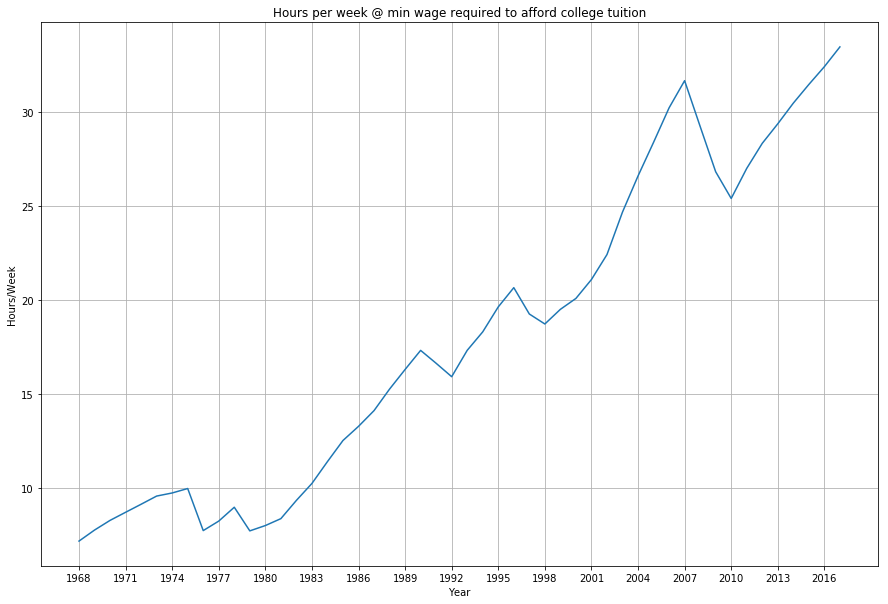

In [15]:
plt.plot([item['year'] for item in final_set], [item['hours'][0]['Tuition-All'] for item in final_set])
plt.title('Hours per week @ min wage required to afford college tuition')
plt.xlabel('Year')
plt.ylabel('Hours/Week')
plt.xticks(np.arange(1968, 2017, 3))
plt.grid()
plt.show()

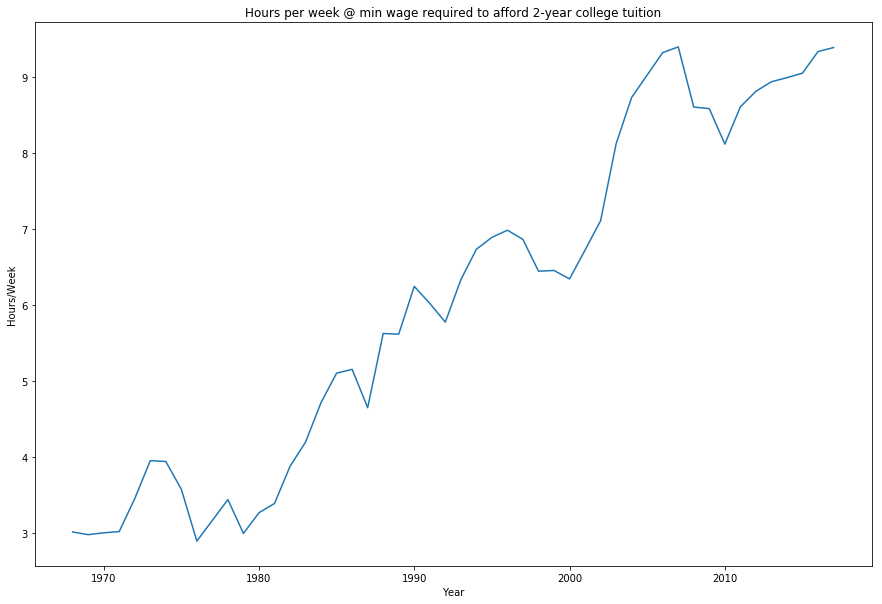

In [16]:
plt.plot([item['year'] for item in final_set], [item['hours'][0]['Tuition-2'] for item in final_set])
plt.title('Hours per week @ min wage required to afford 2-year college tuition')
plt.xlabel('Year')
plt.ylabel('Hours/Week')
plt.show()